In [1]:
import pandas as pd
import os
import sys
from datetime import datetime
import re

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from mizani.formatters import percent_format
from plotnine import *

In [2]:
df=pd.read_csv('films2021_2022_clean.csv', encoding='utf-8-sig',sep=";")
df

,Titre,genre1,genre2,réalisateur_1,actor_1,actor 2,actor 3,note_presse,note_spectators,Scenar,...,language,real awards,first actor awards,Second actor awards,length_corrected,day,month,year,nomi,awards
0,#No_Filter,Epouvante-horreur,Thriller,Michael Dupret,Hannah McIver,Jasmine Daoud,Samuel Van der Zwalmen,NaN,bad,NaN,...,Anglais,0.0,0.0,0.0,87,5,mai,2023,0,0
1,13 : La comédie musicale,Drame,Famille,Tamra Davis,Eli Golden,Josh Peck,Debra Messing,NaN,soso,Robert Horn,...,Anglais,1.0,0.0,0.0,94,12,août,2022,0,0
2,16 ans,Drame,Romance,Philippe Lioret,Sabrina Levoye,Teïlo Azaïs,Jean-Pierre Lorit,"3,2",good,Philippe Lioret,...,Français,4.0,0.0,0.0,94,4,janvier,2023,1,0
3,1UP,Comédie,NaN,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,Ruby Rose,NaN,soso,Julia Yorks,...,Anglais,0.0,0.0,0.0,100,15,juillet,2022,0,0
4,365 jours : Au lendemain,Drame,Erotique,Barbara Bialowas,Michele Morrone,Anna-Maria Sieklucka,Simone Susinna,NaN,bad,Tomasz Mandes,...,Anglais,0.0,0.0,0.0,106,27,avril,2022,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,Xtreme,Action,Policier,Daniel Benmayor,Teo García,Óscar Jaenada,Oscar Casas,NaN,soso,Iván Ledesma,...,Espagnol,0.0,0.0,0.0,111,4,juin,2021,0,0
2174,Yakuza Princess,Arts Martiaux,Thriller,Vicente Amorim,MASUMI,Jonathan Rhys-Meyers,Tsuyoshi Ihara,NaN,soso,Vicente Amorim,...,Anglais,1.0,0.0,1.0,111,15,janvier,2022,0,0
2175,Yara,Policier,Drame,Marco Tullio Giordana,Isabella Ragonese,Alessio Boni,Thomas Trabacchi,NaN,good,Graziano Diana,...,Italien,2.0,0.0,0.0,94,5,novembre,2021,0,0
2176,Yes Day,Comédie,Famille,Miguel Arteta,Jennifer Garner,Édgar Ramírez,Jenna Ortega,NaN,soso,Justin Malen,...,Anglais,10.0,1.0,2.0,86,12,mars,2021,0,0


In [3]:
#Analysis by nationality

#Number films by country on the years 2022 and 2021
df.nationality_1.value_counts()

U.S.A.                 727
France                 453
Inde                   156
Grande-Bretagne         94
Allemagne               66
                      ... 
Barbade                  1
Emirats Arabes Unis      1
Tanzanie                 1
Bénin                    1
Serbie                   1
Name: nationality_1, Length: 81, dtype: int64

In [16]:
#To have it in percentage
normalized_natio = df.nationality_1.value_counts(normalize=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 [Text(0, 0, 'U.S.A.'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Inde'),
  Text(3, 0, 'Grande-Bretagne'),
  Text(4, 0, 'Allemagne'),
  Text(5, 0, 'Italie'),
  Text(6, 0, 'Canada'),
  Text(7, 0, 'Espagne'),
  Text(8, 0, 'Japon'),
  Text(9, 0, 'Pologne'),
  Text(10, 0, 'Belgique'),
  Text(11, 0, 'Corée du Sud'),
  Text(12, 0, 'Turquie'),
  Text(13, 0, 'Mexique'),
  Text(14, 0, 'Brésil'),
  Text(15, 0, 'Australie'),
  Text(16, 0, 'Suède'),
  Text(17, 0, 'Indonésie'),
  Text(18, 0, 'Russie'),
  Text(19, 0, 'Suisse'),
  Text(20, 0, 'Afrique du Sud'),
  Text(21, 0, 'Argentine'),
  Text(22, 0, 'Danemark'),
  Text(23, 0, 'Chine'),
  Text

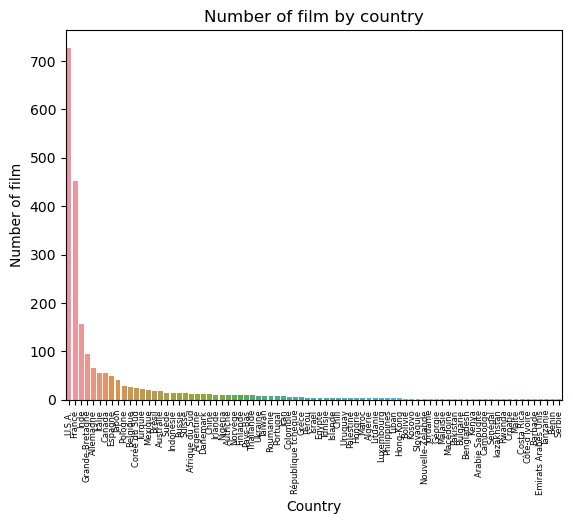

In [14]:
sn.barplot(x=df.nationality_1.value_counts().index, y=df.nationality_1.value_counts().values)
plt.title("Number of film by country")
plt.xlabel("Country")
plt.ylabel("Number of film")
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=5) 
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 [Text(0, 0, 'U.S.A.'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Inde'),
  Text(3, 0, 'Grande-Bretagne'),
  Text(4, 0, 'Allemagne'),
  Text(5, 0, 'Italie'),
  Text(6, 0, 'Canada'),
  Text(7, 0, 'Espagne'),
  Text(8, 0, 'Japon'),
  Text(9, 0, 'Pologne'),
  Text(10, 0, 'Belgique'),
  Text(11, 0, 'Corée du Sud'),
  Text(12, 0, 'Turquie'),
  Text(13, 0, 'Mexique'),
  Text(14, 0, 'Brésil'),
  Text(15, 0, 'Australie'),
  Text(16, 0, 'Suède'),
  Text(17, 0, 'Indonésie'),
  Text(18, 0, 'Russie'),
  Text(19, 0, 'Suisse'),
  Text(20, 0, 'Afrique du Sud'),
  Text(21, 0, 'Argentine'),
  Text(22, 0, 'Danemark'),
  Text(23, 0, 'Chine'),
  Text

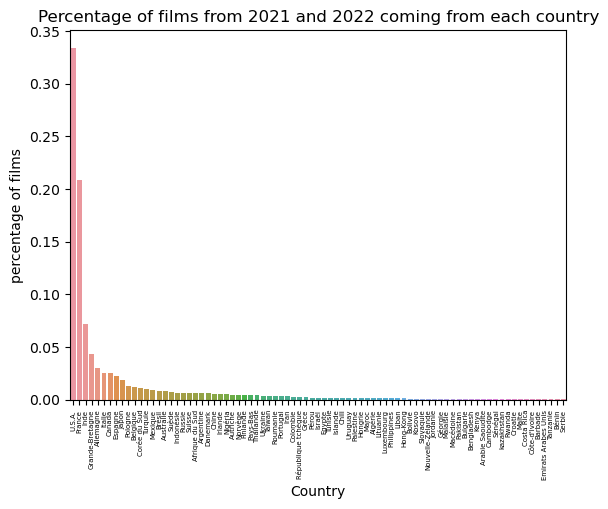

In [22]:
sn.barplot(x=normalized_natio.index, y=normalized_natio.values)
plt.title("Percentage of films from 2021 and 2022 coming from each country")
plt.xlabel("Country")
plt.ylabel("percentage of films")
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=5) 
plt.xticks(rotation='vertical')

We will now try to make some map to make the information with the countries more visual

In [20]:
pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 9.9 MB/s eta 0:00:00
     --------------------------------------- 22.7/22.7 MB 14.5 MB/s eta 0:00:00
  Using cached shapely-2.0.1-cp39-cp39-win_amd64.whl (1.4 MB)
  Using cached pyproj-3.5.0-cp39-cp39-win_amd64.whl (5.1 MB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\User\AppData\Local\Temp\ipykernel_308040\3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.


In [28]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [29]:
#world['centroid'] = world.centroid

In [30]:
world=world.drop(["pop_est","continent","iso_a3","gdp_md_est"], axis=1)

In [46]:
world

,name,geometry
103,Afghanistan,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
125,Albania,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
82,Algeria,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
74,Angola,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
159,Antarctica,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140..."
...,...,...
2,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
157,Yemen,"POLYGON ((52.00001 19.00000, 52.78218 17.34974..."
70,Zambia,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458..."
48,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


In [53]:
df_sans_NA=df.dropna(axis=0, subset=['nationality_1']).reset_index(drop=True)

In [54]:
world[world.name=="Macedonia"]

,name,geometry


In [55]:
world=world.sort_values('name')

In [56]:
world.name.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Rep.', 'Chad', 'Chile',
       'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark',
       'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador',
       'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.',
       'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 

In [57]:
df["nationality_1"].unique()

array(['Belgium', 'United States of America', 'France', 'Canada',
       'Poland', 'Switzerland', 'Germany', 'Norway', 'Spain',
       'South Korea', 'India', 'United Kingdom', 'Turkey', 'Israel',
       'Portugal', 'South Africa', 'Nigeria', 'Greece', 'Argentina',
       'Tunisia', 'Iran', 'Mexico', 'Peru', 'Sweden', 'Italy', 'Georgia',
       'Japan', 'Ukraine', 'Chile', 'Austria', 'Kenya', 'Philippines',
       'Costa Rica', 'Iceland', 'Finland', 'Denmark', 'Netherlands',
       'Russia', 'Thailand', 'Palestine', 'Ireland', 'Bangladesh', nan,
       'Bulgaria', 'Taiwan', 'Australia', 'Pakistan', 'Colombia',
       'North Macedonia', 'Algeria', 'Benin', 'China', 'Brazil',
       'Malaysia', 'Czechia', 'Lebanon', 'Indonesia', 'Romania',
       'Saudi Arabia', 'Egypt', 'Uruguay', 'Lithuania', 'Slovakia',
       'New Zealand', 'Tanzania', 'Morocco', 'United Arab Emirates',
       'Hungary', 'Jordan', 'Luxembourg', 'Kosovo', 'Bolivia',
       "Côte d'Ivoire", 'Cambodia', 'N. Cyprus', 'Cr

In [58]:
df["nationality_1"]=df["nationality_1"].replace({"Belgique":'Belgium','U.S.A.':'United States of America','France':'France', 'Pologne':'Poland'
                                                ,'Suisse':'Switzerland','Allemagne':'Germany','Norvège':'Norway','Espagne':'Spain',
                                                'Corée du Sud':'South Korea','Inde':"India",'Grande-Bretagne':'United Kingdom',
                                                'Turquie':'Turkey','Israël':'Israel','Portugal':'Portugal','Afrique du Sud':'South Africa',
                                                'Nigéria':'Nigeria','Grèce':'Greece','Argentine':'Argentina','Tunisie':'Tunisia','Iran':'Iran',
                                                'Mexique':'Mexico','Pérou':'Peru','Suède':'Sweden','Italie':'Italy','Géorgie':'Georgia',
                                                'Japon':'Japan','Ukraine':'Ukraine','Chili':'Chile','Autriche':'Austria','Kenya':'Kenya',
                                                'Philippines':'Philippines', 'Costa Rica':'Costa Rica','Islande':'Iceland','Finlande':'Finland',
                                                'Danemark':'Denmark','Pays-Bas':'Netherlands','Russie':'Russia','Thaïlande':'Thailand',
                                                'Palestine':'Palestine','Irlande':'Ireland','Bengladesh':'Bangladesh','Bulgarie':'Bulgaria','Taïwan':'Taiwan',
                                                'Australie':'Australia', 'Pakistan':'Pakistan','Colombie':'Colombia', 'Macédoine':'North Macedonia',
                                                 'Algérie':'Algeria', 'Bénin':'Benin', 'Chine':'China', 'Brésil':'Brazil','Malaisie':'Malaysia',
                                                 'République tchèque':'Czechia', 'Liban':'Lebanon', 'Barbade':'United States of America', 'Indonésie':'Indonesia',
                                                'Roumanie':'Romania', 'Arabie Saoudite':'Saudi Arabia', 'Egypte':'Egypt',
                                                 'Uruguay':'Uruguay', 'Lituanie':'Lithuania','Hong-Kong':'China', 'Slovaquie':'Slovakia',
                                                 'Nouvelle-Zélande':'New Zealand', 'Tanzanie':'Tanzania', 'Maroc':'Morocco',
                                                'Emirats Arabes Unis':'United Arab Emirates', 'Hongrie':'Hungary', 'Jordanie':'Jordan',
                                                 'Luxembourg':'Luxembourg','Kosovo':'Kosovo', 'Bolivie':'Bolivia', "Côte-d'Ivoire":"Côte d'Ivoire",
                                                 'Cambodge':'Cambodia', 'Malte':'N. Cyprus','Croatie':'Croatia',
                                                 'Rwanda':'Rwanda', 'kazakhstan':'Kazakhstan', 'Sénégal':'Senegal', 'Serbie':'Serbia'})

In [65]:
value_count=df_sans_NA["nationality_1"].value_counts()

In [67]:
new_df=pd.DataFrame(value_count)

In [96]:
new_df_reset = new_df.reset_index()
new_df_reset.columns = ['country', 'counts'] # change column names

In [97]:
new_df_reset

,country,counts
0,United States of America,728
1,France,453
2,India,156
3,United Kingdom,94
4,Germany,66
...,...,...
74,Benin,1
75,Tanzania,1
76,Costa Rica,1
77,Saudi Arabia,1


In [111]:
geomap= world.merge(new_df_reset,right_on='country', left_on="name")


In [106]:
world_bis=world_bis.drop(["counts"],axis=1)

<AxesSubplot:>

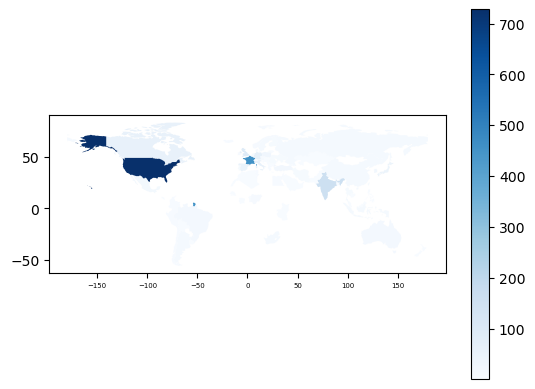

In [116]:
geomap.plot(column="counts", cmap="Blues", legend=True)